# Diamonds Price Prediction - Descriptive Analysis

#### In this notebook we will use machine learning techniques to predict diamods price
#### Steps:
    - Understand our data: variable characteristics, measures, etc
    - The objective: diamonds price prediction
    - Clean data: check for nulls, invalid data, etc
    - Scale data: if needed
    - Split data: train-test
    - Fit & predict models: use different models
    - Test results: test different models results
    - Apply best model: apply trained best model to new data

![diamond-anatomy-png](https://github.com/diego-florez/Diamonds-Price-Prediction/blob/master/src/diamond-anatomy.png)
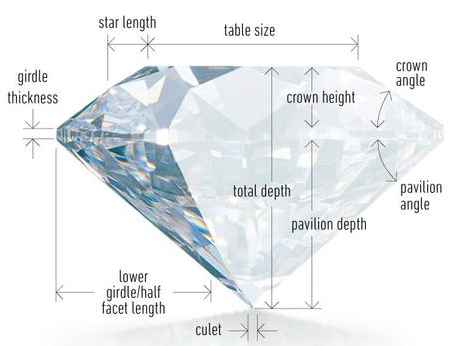

#### Above we can see all diamond measures
#### Below we see all the features and characteristics given to predict the diamonds price

This image and this index will be useful to clean, treat and describe our data

![diamonds-price-schema-png](https://github.com/diego-florez/Diamonds-Price-Prediction/blob/master/src/diamonds-price-schema.png)
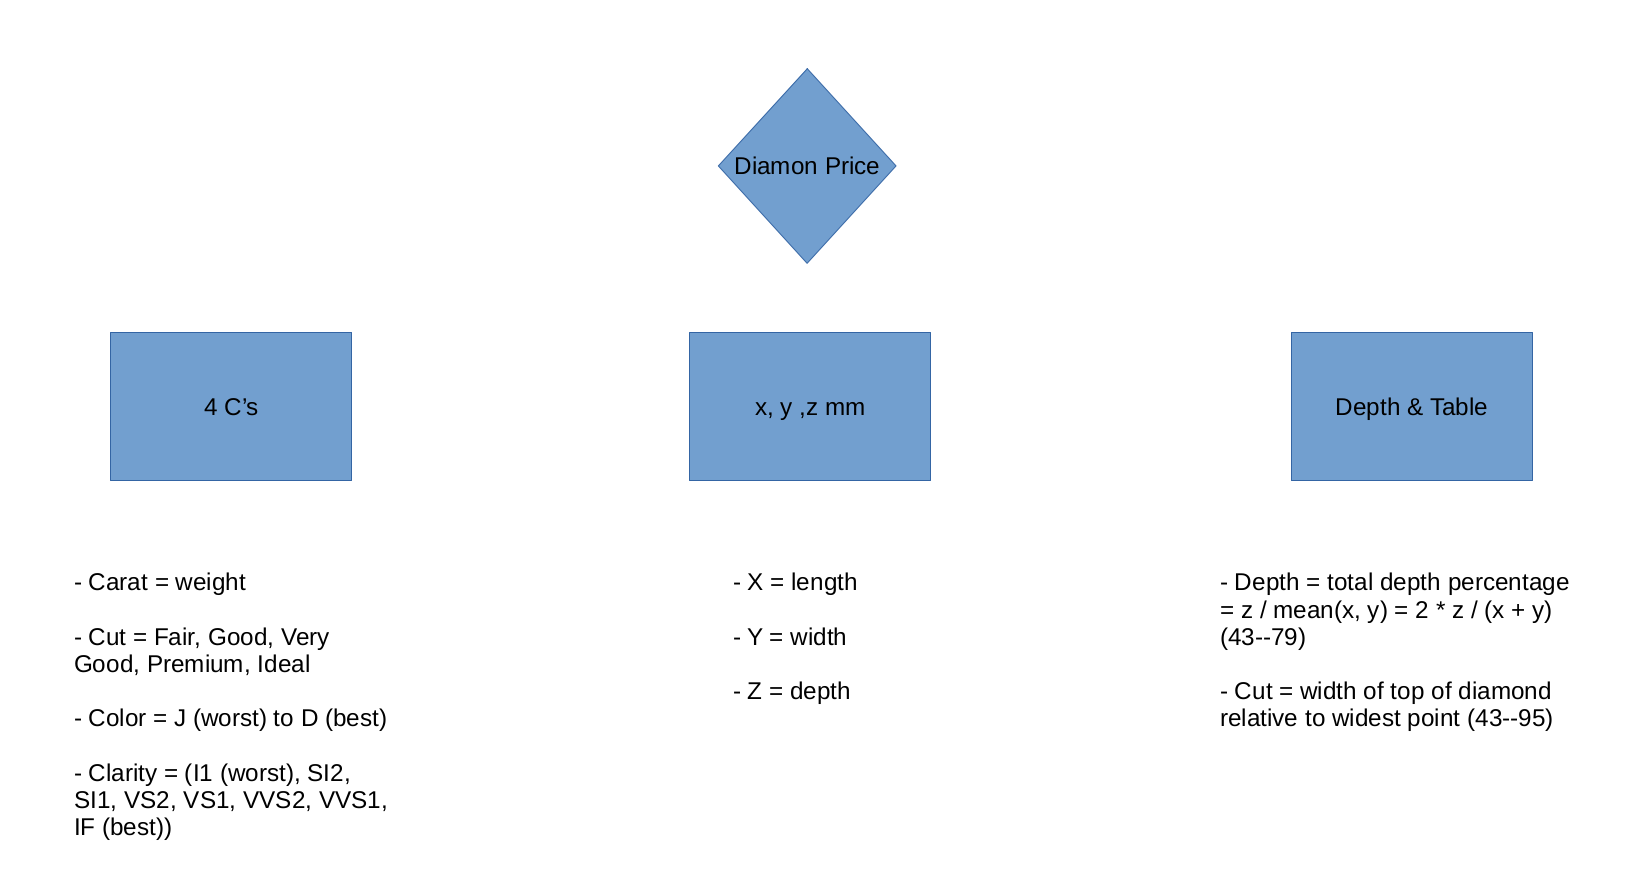

In [1]:
#import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Training Data

In [2]:
traindf = pd.read_csv("INPUT/diamonds_train.csv")
print(traindf.shape)
traindf.head()

(40345, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


#### Okay now that we have the data, lets type the insides we can get:
    - Datasets: 2 --> 1 for training (above), 1 for testing (will be loaded at the end)
    - Data training: 1 index and 10 variables with different nature:
        - Categorical: cut, color, clarity
        - Continuous: carat (weight), depth (total depth %), table, x (length), y (width), z (depth), price
    - Data test: same data, except the price
    - Nulls: no info
    - Aim: predict diamonds price
    - Dependent variable: price --> class = continuous variable
    - Possible solution: as our data is already labeled, we will use supervised machine learning. Also the dependent variable to be predicted is continuous, so we will use regression algorithms
    - Possible Algorithms: go to --> src/algorithms

#### Once we have the insides lets check nulls

In [3]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40345 non-null  int64  
 1   carat       40345 non-null  float64
 2   cut         40345 non-null  object 
 3   color       40345 non-null  object 
 4   clarity     40345 non-null  object 
 5   depth       40345 non-null  float64
 6   table       40345 non-null  float64
 7   x           40345 non-null  float64
 8   y           40345 non-null  float64
 9   z           40345 non-null  float64
 10  price       40345 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


#### Non null data, lets check the frequency of our categorical variables and its relation with the price

In [4]:
cut = traindf.cut.value_counts()
cut

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

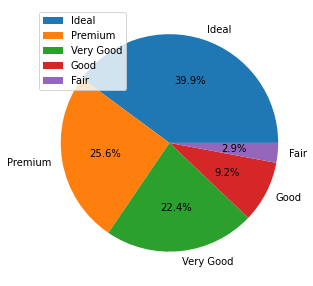

In [5]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(cut, labels=cut.keys(), autopct='%1.1f%%')
ax.legend(labels=cut.keys(), loc=2)

#### We can see the distribution of the cut is not uniform, being fair cut the smallest sample

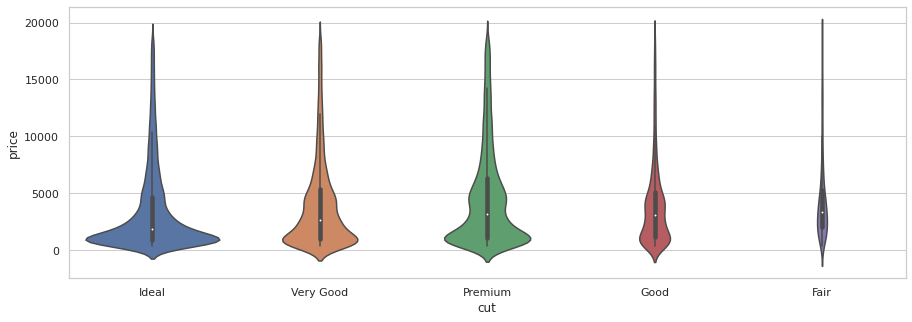

In [6]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.violinplot(x="cut", y="price", data=traindf, scale="count")

#### It seems like the ideal cut could have a negative correlation with price. Although it is the biggest group, premium and very good cuts have a bigger percentage of its sample in a higher price

In [7]:
color = traindf.color.value_counts()
color

G    8499
E    7351
F    7130
H    6234
D    5074
I    4023
J    2034
Name: color, dtype: int64

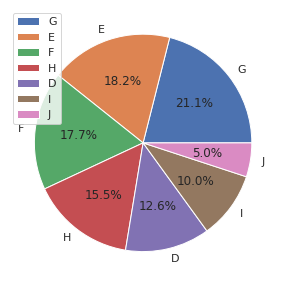

In [8]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(color, labels=color.keys(), autopct='%1.1f%%')
ax.legend(labels=color.keys(), loc=2)

#### The frequency of the color is fairer distributed than the cut, however G, the biggest group is 75 times bigger than G. It is also good to remember the scale of colors: J (worst) to D (best)

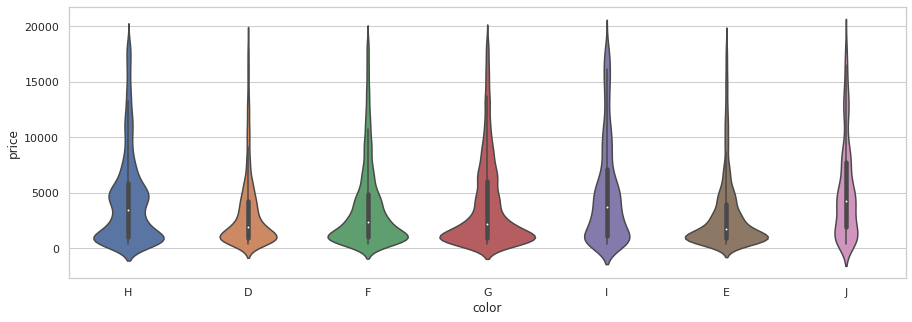

In [9]:
plt.figure(figsize=(15,5))
sns.violinplot(x="color", y="price", data=traindf, scale="count")

#### This graphic shows us an interesting info; although J and I are the "worst" colors respectively, their median price is the biggest. Also, the opposite happens for D and E; although they are the best colors, their median price are the lowest. So here we could say that price and color seems to have a negative correlation; the best the color the lower the price

In [10]:
clarity = traindf.clarity.value_counts()
clarity

SI1     9751
VS2     9178
SI2     6828
VS1     6101
VVS2    3858
VVS1    2714
IF      1362
I1       553
Name: clarity, dtype: int64

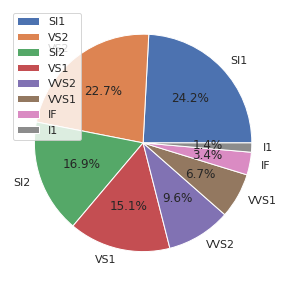

In [11]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(clarity, labels=clarity.keys(), autopct='%1.1f%%')
ax.legend(labels=clarity.keys(), loc=2)

#### We clearly see the clarity is maybe the less uniform dritributed feature. Taking it scale: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best), we see that the worst and best clarities are also the weirdest

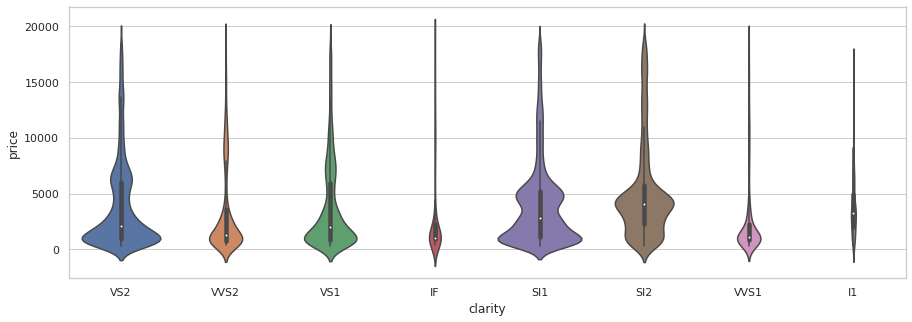

In [12]:
plt.figure(figsize=(15,5))
sns.violinplot(x="clarity", y="price", data=traindf, scale="count")

#### Here we see again a relation between clarity and price which seems to be negative. From worst clarity to best, the price decreases. The exception is I1, which is in the 2nd position but maybe because of its small sampe size

#### Once we have done a descriptive analysis of the categorical variables, lets check the continuous variables

In [13]:
traindf = traindf.iloc[:,1:]

In [14]:
traindf.skew()

carat    1.082037
depth   -0.130977
table    0.826090
x        0.368881
y        3.075413
z        0.336432
price    1.618776
dtype: float64

In [15]:
traindf.describe()

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


#### There is something weird in this data; as we can see the min of x, y and z is 0. Rembember these columns are length, width and depth respectively. So lets check the rows where any of these columns = 0

In [16]:
traindf[(traindf.x==0) | (traindf.y==0) | (traindf.z==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
4960,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,18788
5127,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
6571,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.0,12800
10971,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383
12572,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
15252,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,15686
15518,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
18027,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
18658,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
20916,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167


#### Well, definitely the volume of these diamonds is not correct, as a diamond cannot have 0 depth (check the image above). So now the question is: should we exclude or include these rows to train our models? Lets asnwer the question by checking the test dataset and see if there are these kind of values too

In [17]:
testdf = pd.read_csv("INPUT/diamonds_test.csv")
print(testdf.shape)
testdf.head()

(13449, 10)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [18]:
testdf[(testdf.x==0) | (testdf.y==0) | (testdf.z==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
3694,3694,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0
10393,10393,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0


#### There are just 2 diamonds with these characteristics, so the best opt will be to exclude the 0 volume rows in the train dataset

In [19]:
traindf = traindf[(traindf.x!=0) | (traindf.y!=0) | (traindf.z!=0)]

#### Now lets see the correlation between vars

Text(0.5, 1.0, 'Correlation matrix')

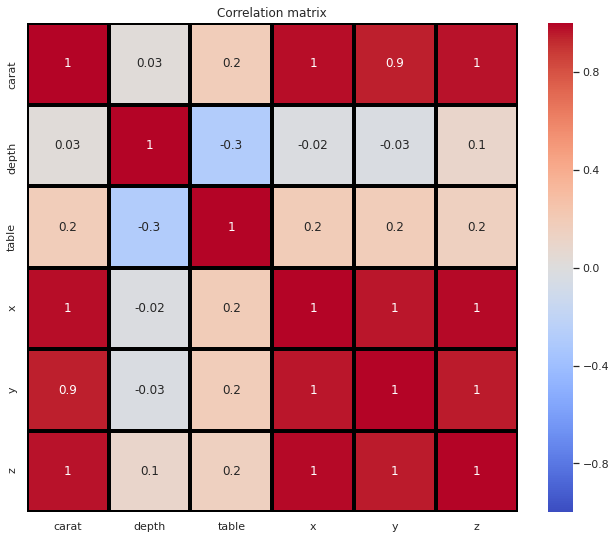

In [21]:
plt.figure(figsize=(11,9))

sns.heatmap(traindf.iloc[:,:-1].corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

#### Wow! It seems like we have a lot of vars really correlated. But of course; x * y * z = volume and carat depends mostly on volume to be computed. So our model suffers from multicollinearity, which could be a problem for linear models. Therefore we will solve one correlation by obtaining the volume/size from x, y and z, but we will let carat and volume for further analysis

In [22]:
traindf["volume"] = traindf.x * traindf.y * traindf.z
traindf["volume"].head()

0    190.734930
1     45.921708
2     69.338592
3     43.362176
4    176.802840
Name: volume, dtype: float64

In [24]:
traindf = traindf.drop(columns={"x","y","z"})

Text(0.5, 1.0, 'Correlation matrix')

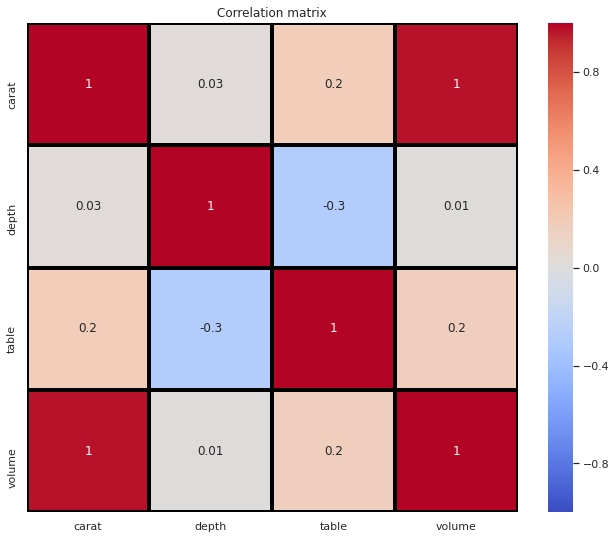

In [30]:
plt.figure(figsize=(11,9))

sns.heatmap(traindf.loc[:,traindf.columns!="price"].corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

#### Now that we have included 3 columns in 1 lets check the relation of all the continuos variables with price

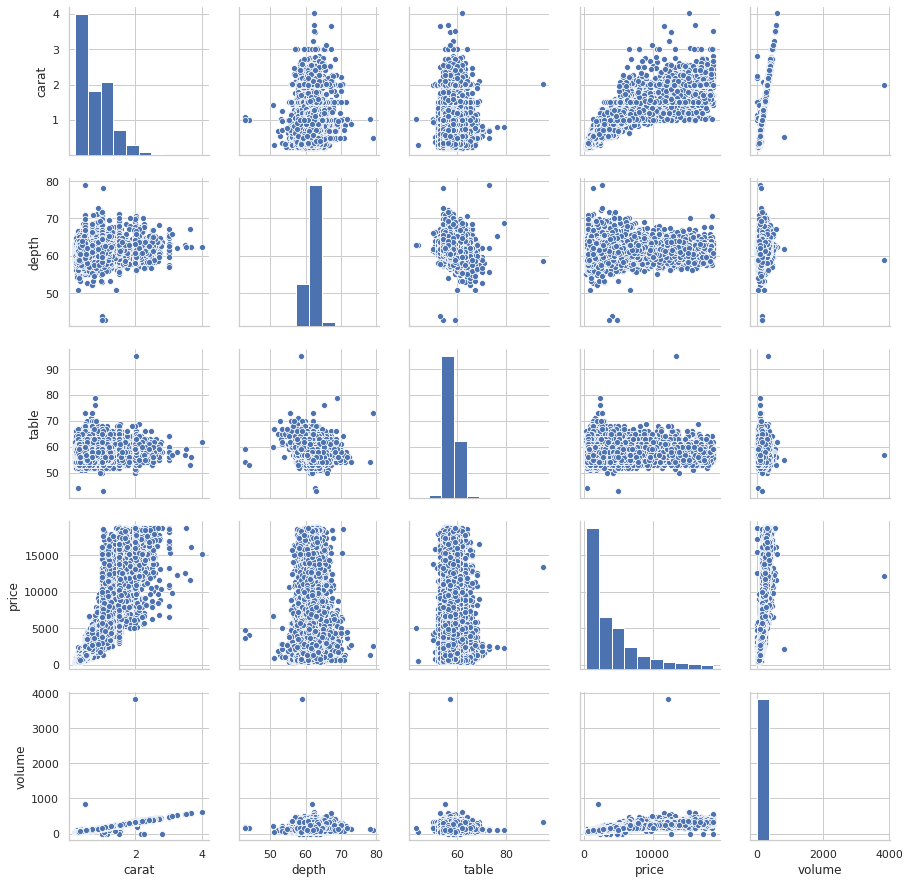

In [31]:
sns.pairplot(traindf)

####  As we can see the depth and table don't have a relevant effect in the price, while the volume seems to have a little exponential relation and the carat a clearly exponential relation

#### To finish this part, we will export the cleaned df to train our models. 1st we will test it in linear models and then in non linear ones

In [37]:
traindf.to_csv("OUTPUT/cleaned_train.csv")